## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np  #let's bring this one in too just in case

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(mouse_metadata,study_results,how='outer',on='Mouse ID')
# Display the data table for preview
mouse_study_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = len(mouse_study_df['Mouse ID'].value_counts())
print(f'There are {num_mice} mice in the study.')

There are 249 mice in the study.


In [3]:
#Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dup = mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
mouse_dup;

#looks like there is only one mouse that has duplicate entries in the data - let's see just how many dups there are
num_dups = len(mouse_study_df.loc[mouse_study_df.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'])
print(f'There are {num_dups} duplicate rows in the data set.')

There are 5 duplicate rows in the data set.


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_study_df[mouse_study_df['Mouse ID']=='g989'] #doesn't seem like we'll have any use for this later, so I won't save it in a dataframe for now

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mouse_study_df[mouse_study_df['Mouse ID'].isin(mouse_dup)==False]
#bit of googling - isin seems to return a dataframe of booleans and proves helpful here
cleaned_df.head(5)

# in this case, since we know which rows are duplicated, maybe we could have just removed those rows and kept the mouse instead

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_num = len(cleaned_df['Mouse ID'].value_counts())
print(f'There are {mouse_num} mice in the cleaned data set.')

There are 248 mice in the cleaned data set.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
ss_df = cleaned_df.loc[:,['Mouse ID','Drug Regimen','Tumor Volume (mm3)']]
ss_df.head(5)
# This method is the most straighforward, creating multiple series and putting them all together at the end.
ss_mean = ss_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'] #for some reason I always try to put the variable inside the parentheses first
ss_med = ss_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)']
ss_var = ss_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)'] #I believe var is shorthand for another concept (value at risk) but thankfully it is not relevant to this exercise - so no confusion
ss_std = ss_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
ss_sem = ss_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

summary_df = pd.DataFrame({'Mean Tumor Volume':ss_mean,
                          'Median Tumor Volume':ss_med,
                          'Variance':ss_var,
                          'STD':ss_std,
                          'SEM':ss_sem}).round(2) #might as well format here
summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
# probably shoud use agg here... need to remember that it takes a dictionary
alternate_summary = ss_df.groupby(['Drug Regimen']).agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']}).round(2)
alternate_summary

Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

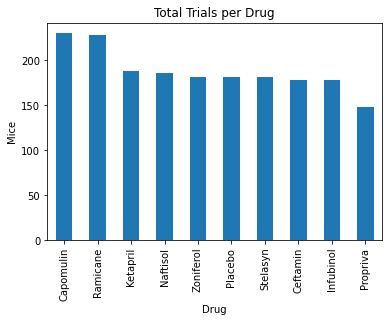

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
treatment_df = cleaned_df['Drug Regimen'].value_counts()
treatment_df;

treatment_df.plot(kind='bar',title='Total Trials per Drug') #xlabel='Drug',ylabel='Mice'
#not sure what version of pandas is being used, but the above plot function will not accept xlabel and ylabel - they seem to be new in pandas 1.1 
#thus we will use pyplot to format the labels...
plt.ylabel('Mice')
plt.xlabel('Drug')
plt.show()

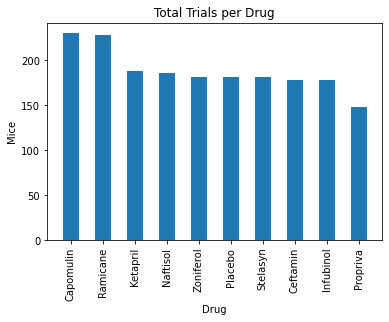

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
y_axis = treatment_df.values
x_axis = treatment_df.index

plt.bar(x_axis,y_axis,align='center',width=0.5) 
plt.xticks(rotation=90) #need to rotate the drug names so they are legible
plt.ylabel('Mice')
plt.xlabel('Drug')
plt.title('Total Trials per Drug')
plt.show()

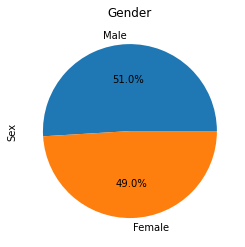

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = cleaned_df['Sex'].value_counts()
gender_df;

gender_df.plot(kind='pie',title='Gender',autopct='%1.1f%%') #not too sure about autopct - had to google a bit

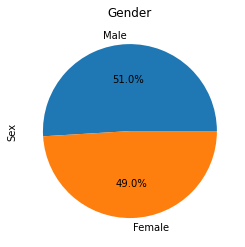

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_df.values,labels=gender_df.index,autopct='%1.1f%%')
plt.title('Gender')
plt.ylabel('Sex') #interesting how this is ylabel
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_checkin = cleaned_df.groupby('Mouse ID').max().reset_index()
last_checkin;

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_tumor = last_checkin[['Mouse ID','Timepoint']].merge(cleaned_df,on=['Mouse ID','Timepoint'],how='left').round(2)
merge_tumor.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.97,2
1,a251,45,Infubinol,Female,21,25,65.53,1
2,a262,45,Placebo,Female,17,29,70.72,4
3,a275,45,Ceftamin,Female,20,28,63.00,3
4,a366,30,Stelasyn,Female,16,29,63.44,1


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_vol_items = merge_tumor['Tumor Volume (mm3)'].loc[merge_tumor['Drug Regimen'] == treatment]    
    
    # add subset 
    tumor_vol.append(tumor_vol_items)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol_items.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = (upperq-lowerq).round(2)
    lower_bound = (lowerq - (1.5*iqr)).round(2)
    upper_bound = (upperq + (1.5*iqr)).round(2)
    print(f'The IQR for tumors treated by {treatment} is {iqr} mm3.')
    print(f'For tumors treated by {treatment}, any tumor with volume smaller than {lower_bound} mm3 could be an outlier.')
    print(f'For tumors treated by {treatment}, any tumor with volume greater than {upper_bound} mm3 could be an outlier.\n')
    

The IQR for tumors treated by Capomulin is 7.78 mm3.
For tumors treated by Capomulin, any tumor with volume smaller than 20.71 mm3 could be an outlier.
For tumors treated by Capomulin, any tumor with volume greater than 51.83 mm3 could be an outlier.

The IQR for tumors treated by Ramicane is 9.1 mm3.
For tumors treated by Ramicane, any tumor with volume smaller than 17.91 mm3 could be an outlier.
For tumors treated by Ramicane, any tumor with volume greater than 54.31 mm3 could be an outlier.

The IQR for tumors treated by Infubinol is 11.48 mm3.
For tumors treated by Infubinol, any tumor with volume smaller than 36.83 mm3 could be an outlier.
For tumors treated by Infubinol, any tumor with volume greater than 82.75 mm3 could be an outlier.

The IQR for tumors treated by Ceftamin is 15.58 mm3.
For tumors treated by Ceftamin, any tumor with volume smaller than 25.35 mm3 could be an outlier.
For tumors treated by Ceftamin, any tumor with volume greater than 87.67 mm3 could be an outlier

Text(0, 0.5, 'Tumor Volume (mm3)')

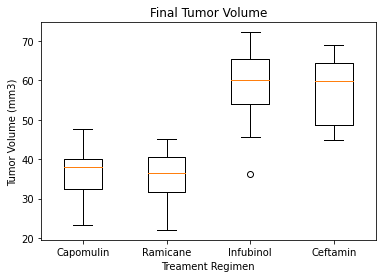

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol,labels=treatments)
plt.title('Final Tumor Volume')
plt.xlabel('Treament Regimen')
plt.ylabel('Tumor Volume (mm3)')

## Line and Scatter Plots

We have selected mouse y793


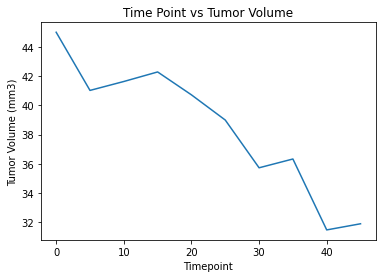

In [26]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_data = cleaned_df.loc[cleaned_df['Drug Regimen']=='Capomulin']

#let's try a random mouse
import random
random.seed(9) #set the seed so I can get the same value each time I rerun this notebook (for consistency)
mouse = random.choice(cap_data['Mouse ID']) 
mouse_stats = cleaned_df.loc[cleaned_df['Mouse ID']==mouse]
print(f'We have selected mouse {mouse}')

plt.plot(mouse_stats['Timepoint'],mouse_stats['Tumor Volume (mm3)'])
plt.title('Time Point vs Tumor Volume')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

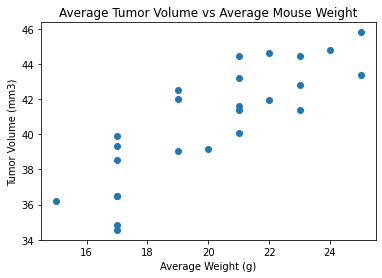

In [21]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_means = cap_data.groupby(['Mouse ID']).mean()
cap_means;

plt.scatter(cap_means['Weight (g)'],cap_means['Tumor Volume (mm3)'])
plt.title('Average Tumor Volume vs Average Mouse Weight')
plt.xlabel('Average Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation coefficient is 0.84
The equation of the linear regression line is y = 0.95x + 21.55


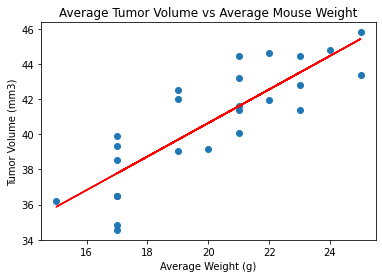

In [33]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(cap_means['Weight (g)'],cap_means['Tumor Volume (mm3)'])
corr = round(rvalue,2)
y_values = cap_means['Weight (g)'] * slope + intercept
line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
st.pearsonr(cap_means['Weight (g)'],cap_means['Tumor Volume (mm3)']); #just making sure the rvalue is the one we need

print(f'The correlation coefficient is {corr}')
print(f'The equation of the linear regression line is {line_eq}')

plt.scatter(cap_means['Weight (g)'],cap_means['Tumor Volume (mm3)'])
plt.plot(cap_means['Weight (g)'],y_values,color='red')
plt.title('Average Tumor Volume vs Average Mouse Weight')
plt.xlabel('Average Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

#We could use the annotate method to write something on the plot itself...
